In [202]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [75]:
data = pd.read_csv('./dataset .csv') #import data 

C:\Users\mitik\AppData\Local\Temp\ipykernel_26976\35777921.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./dataset .csv') #import data


In [76]:
data.head(5) 

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,02-01-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,02-01-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,02-01-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,03-01-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,03-01-1990


In [77]:
data.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12-09-2015
435733,SAMP,12-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12-12-2015
435734,SAMP,15-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/15/2015
435735,SAMP,18-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/18/2015
435736,SAMP,21-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/21/2015
435737,SAMP,24-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/2015
435738,SAMP,29-12-2015,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/2015
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [79]:
data.describe() 

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.818431,220.771632,40.791467
std,11.177187,18.503086,74.225569,151.300407,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,1288.000000,3380.000000,504.000000


In [80]:
data.shape 

(435742, 13)

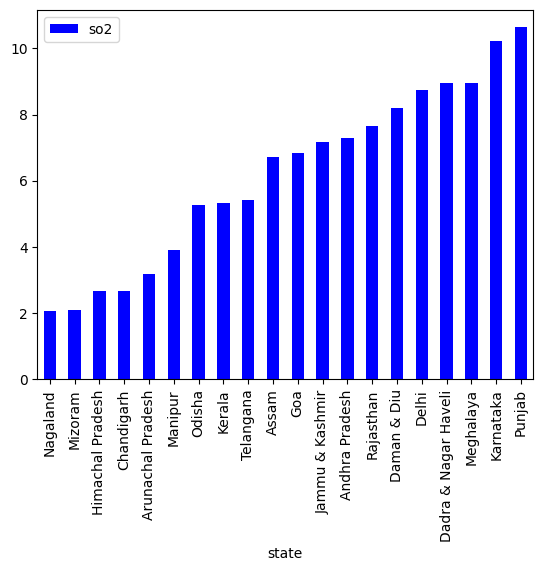

In [81]:
data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').head(20).plot.bar(color='b')
plt.show() 

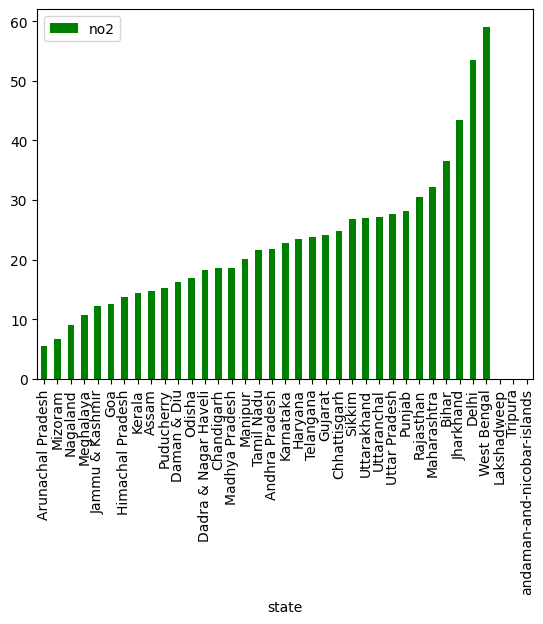

In [82]:
data[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='g')
plt.show()

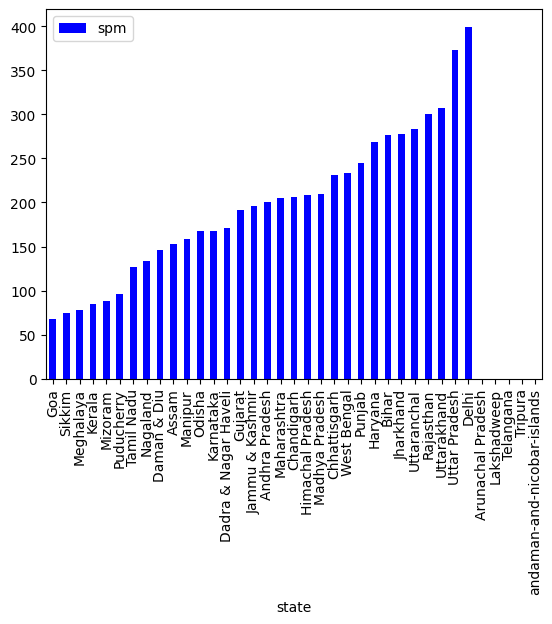

In [83]:
data[['spm','state']].groupby(["state"]).mean().sort_values(by='spm').plot.bar(color='b')
plt.show()

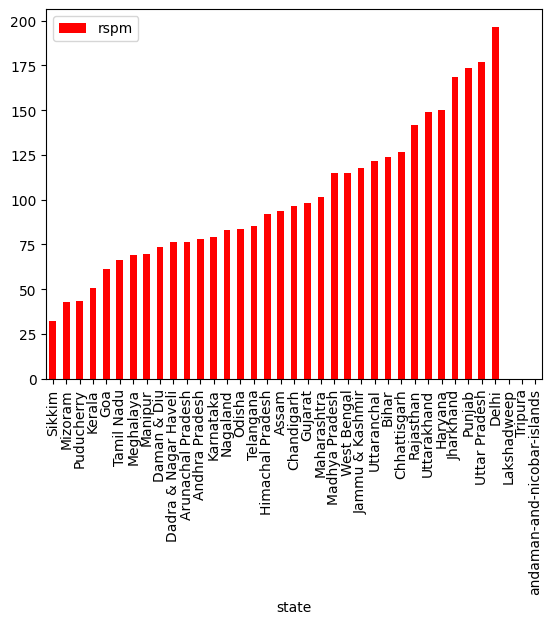

In [84]:
data[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm').plot.bar(color='r')
plt.show()

In [85]:
data.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [86]:
data.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True) 

In [87]:
data.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,02-01-1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,02-01-1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,02-01-1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,03-01-1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,03-01-1990
5,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,03-01-1990
6,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,04-01-1990
7,Andhra Pradesh,Hyderabad,Industrial Area,4.7,8.7,NaN,NaN,NaN,04-01-1990
8,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,04-01-1990
9,Andhra Pradesh,Hyderabad,Industrial Area,4.0,8.9,NaN,NaN,NaN,05-01-1990


In [88]:
total = data.isnull().sum().sort_values(ascending=False) 

In [89]:
total.head()

pm2_5    426428
spm      237387
rspm      40222
so2       34646
no2       16233
dtype: int64

In [90]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)  #count(returns Non-NAN value)

In [91]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [92]:
missing_data.head()

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
rspm,40222,9.230692
so2,34646,7.951035
no2,16233,3.725370


Text(0.5, 1.0, 'Percent missing data by feature')

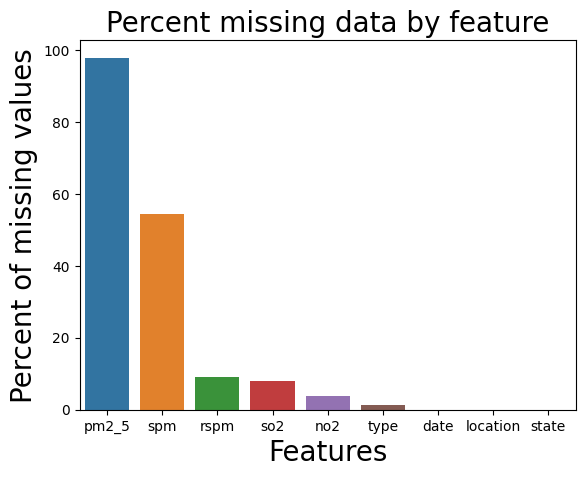

In [93]:
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

In [94]:
data.groupby('state')[['spm','pm2_5','rspm','so2','no2']].mean()

,spm,pm2_5,rspm,so2,no2
state,,,,,
Andhra Pradesh,200.260378,NaN,78.182824,7.284845,21.704451
Arunachal Pradesh,NaN,NaN,76.629213,3.179104,5.469697
Assam,153.355386,NaN,93.724912,6.723263,14.793691
Bihar,276.917416,NaN,123.705176,19.381476,36.575525
Chandigarh,206.056150,NaN,96.587079,2.676986,18.619404
Chhattisgarh,231.290969,NaN,126.472399,12.846609,24.815961
Dadra & Nagar Haveli,170.545024,30.511628,76.536530,8.939587,18.293959
Daman & Diu,145.681416,27.886364,73.749431,8.192958,16.168926
Delhi,399.402088,95.113208,196.639771,8.737273,53.489147


(array([1.74233e+05, 2.30180e+04, 1.02600e+03, 6.10000e+01, 1.10000e+01,
        4.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <BarContainer object of 10 artists>)

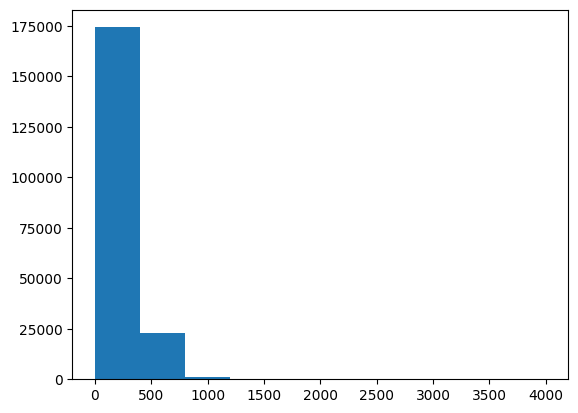

In [95]:
plt.hist(data.spm,range=(0.0,4000)) #spm

(array([4.00522e+05, 4.81000e+02, 6.40000e+01, 2.10000e+01, 6.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

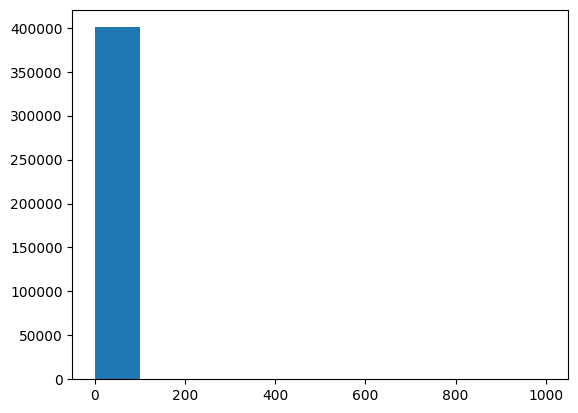

In [96]:
plt.hist(data.so2,range=(0,1000)) #so2

(array([4.16228e+05, 3.10400e+03, 1.32000e+02, 3.20000e+01, 7.00000e+00,
        3.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

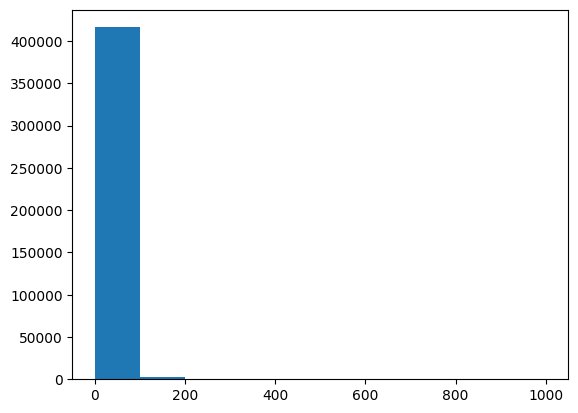

In [97]:
plt.hist(data.no2,range=(0,1000)) #no2

(array([3.95426e+05, 9.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([   0.,  700., 1400., 2100., 2800., 3500., 4200., 4900., 5600.,
        6300., 7000.]),
 <BarContainer object of 10 artists>)

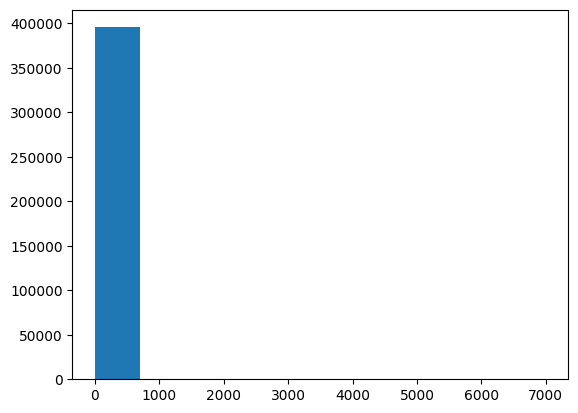

In [98]:
plt.hist(data.rspm,range=(0,7000)) #rspm

(array([8.92e+03, 3.47e+02, 3.90e+01, 7.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

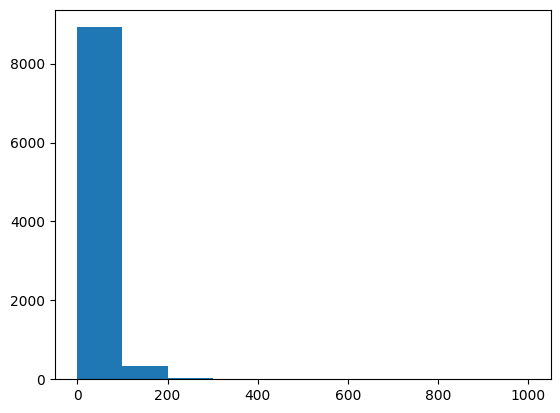

In [99]:
plt.hist(data.pm2_5,range=(0,1000)) #pm2_5

In [100]:
grp_state = data.groupby('state')

In [101]:
def impute_mean_by_state(series):
    return series.fillna(series.mean()) 

In [102]:
data['rspm']=grp_state['rspm'].transform(impute_mean_by_state) 
data['so2']=grp_state['so2'].transform(impute_mean_by_state)
data['no2']=grp_state['no2'].transform(impute_mean_by_state)
data['spm']=grp_state['spm'].transform(impute_mean_by_state)
data['pm2_5']=grp_state['pm2_5'].transform(impute_mean_by_state)

In [103]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,435739.000000,435739.000000,435739.000000,431671.000000,123689.000000
mean,10.589141,25.663170,109.666420,215.189912,48.317274
std,10.863679,18.271145,71.912069,117.411145,21.455206
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,4.800000,14.000000,59.000000,142.000000,30.729696
50%,8.000000,21.800000,93.000000,205.255823,42.204089
75%,13.000000,32.000000,142.016832,248.000000,64.890625
max,909.000000,876.000000,1288.000000,3380.000000,504.000000


In [104]:
data.isna().sum()

state            0
location         3
type          5393
so2              3
no2              3
rspm             3
spm           4071
pm2_5       312053
date             7
dtype: int64

(array([4.35165e+05, 4.81000e+02, 6.40000e+01, 2.10000e+01, 6.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

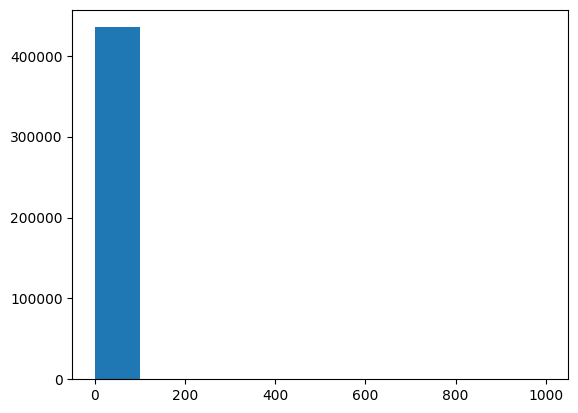

In [105]:
plt.hist(data.so2,range=(0,1000))

(array([4.35645e+05, 9.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([   0.,  700., 1400., 2100., 2800., 3500., 4200., 4900., 5600.,
        6300., 7000.]),
 <BarContainer object of 10 artists>)

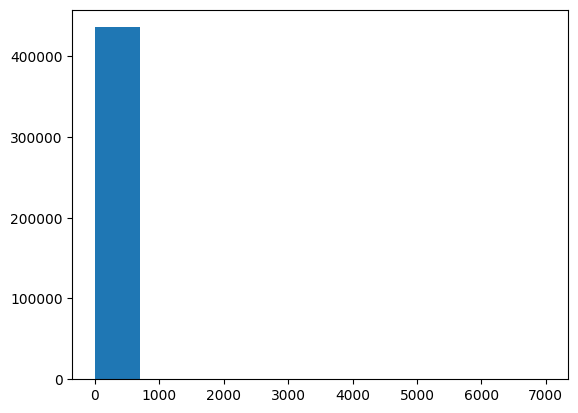

In [106]:
plt.hist(data.rspm,range=(0,7000))

(array([4.32458e+05, 3.10400e+03, 1.32000e+02, 3.20000e+01, 7.00000e+00,
        3.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

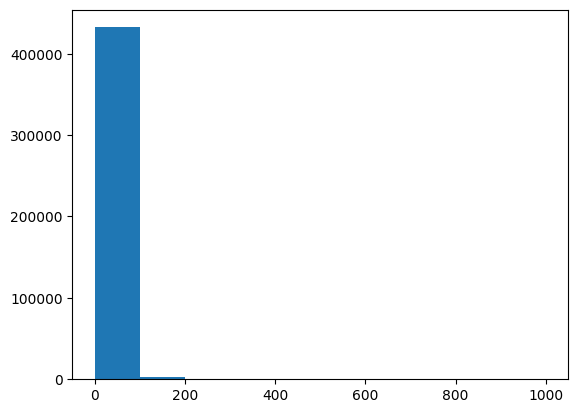

In [107]:
plt.hist(data.no2,range=(0.0,1000))

(array([4.07549e+05, 2.30180e+04, 1.02600e+03, 6.10000e+01, 1.10000e+01,
        4.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00]),
 array([   0.,  400.,  800., 1200., 1600., 2000., 2400., 2800., 3200.,
        3600., 4000.]),
 <BarContainer object of 10 artists>)

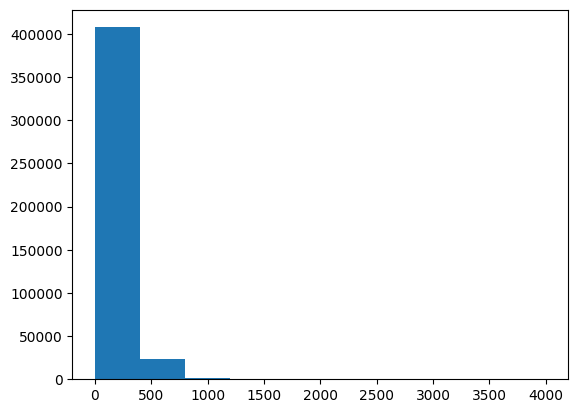

In [108]:
plt.hist(data.spm,range=(0.0,4000)) #spm

In [109]:
data.tail(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
435732,West Bengal,ULUBERIA,RIRUO,22.0,50.0,145.0,233.506524,64.890625,12-09-2015
435733,West Bengal,ULUBERIA,RIRUO,34.0,61.0,161.0,233.506524,64.890625,12-12-2015
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,233.506524,64.890625,12/15/2015
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,233.506524,64.890625,12/18/2015
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,233.506524,64.890625,12/21/2015
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,233.506524,64.890625,12/24/2015
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,233.506524,64.890625,12/29/2015
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
df= data[['so2','SOi']]
df.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [111]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
df= data[['no2','Noi']]
df.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [112]:
def cal_RSPMi(rspm):
    rpi=0
    if(rspm<=100):
     rpi = rspm
    elif(rspm>=101 and rspm<=150):
     rpi= 101+(rspm-101)*((200-101)/(150-101))
    elif(rspm>=151 and rspm<=350):
     ni= 201+(rspm-151)*((300-201)/(350-151))
    elif(rspm>=351 and rspm<=420):
     ni= 301+(rspm-351)*((400-301)/(420-351))
    elif(rspm>420):
     ni= 401+(rspm-420)*((500-401)/(420-351))
    return rpi
data['RSPMi']=data['rspm'].apply(cal_RSPMi)
df= data[['rspm','RSPMi']]
df.head()

,rspm,RSPMi
0,78.182824,78.182824
1,78.182824,78.182824
2,78.182824,78.182824
3,78.182824,78.182824
4,78.182824,78.182824


In [113]:
df.tail()

,rspm,RSPMi
435737,143.0,185.857143
435738,171.0,0.000000
435739,NaN,0.000000
435740,NaN,0.000000
435741,NaN,0.000000


In [114]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
df= data[['spm','SPMi']]
df.head()

,spm,SPMi
0,200.260378,166.840252
1,200.260378,166.840252
2,200.260378,166.840252
3,200.260378,166.840252
4,200.260378,166.840252


In [115]:
def cal_pmi(pm2_5):
    pmi=0
    if(pm2_5<=50):
     pmi=pm2_5*(50/50)
    elif(pm2_5>50 and pm2_5<=100):
     pmi=50+(pm2_5-50)*(50/50)
    elif(pm2_5>100 and pm2_5<=250):
     pmi= 100+(pm2_5-100)*(100/150)
    elif(pm2_5>250 and pm2_5<=350):
     pmi=200+(pm2_5-250)*(100/100)
    elif(pm2_5>350 and pm2_5<=450):
     pmi=300+(pm2_5-350)*(100/100)
    else:
     pmi=400+(pm2_5-430)*(100/80)
    return pmi
data['PMi']=data['pm2_5'].apply(cal_pmi)
df= data[['pm2_5','PMi']]
df.head()


,pm2_5,PMi
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [116]:
type(data['PMi'])

pandas.core.series.Series

In [117]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi ):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi ):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['RSPMi'],x['SPMi']),axis=1)
df= data[['state','SOi','Noi','RSPMi','SPMi','AQI']]
df.head()


,state,SOi,Noi,RSPMi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,78.182824,166.840252,166.840252
1,Andhra Pradesh,3.875,8.750,78.182824,166.840252,166.840252
2,Andhra Pradesh,7.750,35.625,78.182824,166.840252,166.840252
3,Andhra Pradesh,7.875,18.375,78.182824,166.840252,166.840252
4,Andhra Pradesh,5.875,9.375,78.182824,166.840252,166.840252


In [118]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,02-01-1990,6.000,21.750,78.182824,166.840252,NaN,166.840252
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,02-01-1990,3.875,8.750,78.182824,166.840252,NaN,166.840252
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,02-01-1990,7.750,35.625,78.182824,166.840252,NaN,166.840252
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,03-01-1990,7.875,18.375,78.182824,166.840252,NaN,166.840252
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,03-01-1990,5.875,9.375,78.182824,166.840252,NaN,166.840252


In [119]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()


,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,78.182824,200.260378,NaN,02-01-1990,6.000,21.750,78.182824,166.840252,NaN,166.840252,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,78.182824,200.260378,NaN,02-01-1990,3.875,8.750,78.182824,166.840252,NaN,166.840252,Poor
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,78.182824,200.260378,NaN,02-01-1990,7.750,35.625,78.182824,166.840252,NaN,166.840252,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,78.182824,200.260378,NaN,03-01-1990,7.875,18.375,78.182824,166.840252,NaN,166.840252,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,78.182824,200.260378,NaN,03-01-1990,5.875,9.375,78.182824,166.840252,NaN,166.840252,Poor


In [120]:
# d=data #saving data in new value
# d['AQI_Range'].uinque()

In [121]:
data=data.dropna(subset=['spm']) #spm

In [122]:
data=data.dropna(subset=['pm2_5']) #spm

In [123]:
data.isna().sum() #all null values removed 

state           0
location        0
type         1925
so2             0
no2             0
rspm            0
spm             0
pm2_5           0
date            1
SOi             0
Noi             0
RSPMi           0
SPMi            0
PMi             0
AQI             0
AQI_Range       0
dtype: int64

Linear Regression prediction

1. Using SOi, NOi, RSPMi, SPMi TO PREDICT AQI

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [125]:
X = data[['SOi','Noi','RSPMi','SPMi']]
y = data['AQI']
y.head()

64445    76.53653
64446    76.53653
64447    76.53653
64448    76.53653
64449    76.53653
Name: AQI, dtype: float64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [127]:
X_train.head()

,SOi,Noi,RSPMi,SPMi
360028,3.750,40.000,51.000000,117.819376
434684,2.500,46.250,87.000000,189.004349
64493,13.250,23.375,115.142857,210.000000
433906,5.000,55.000,115.142857,189.004349
183595,34.375,26.000,91.000000,106.000000


In [128]:
LR = LinearRegression() 
LR.fit(X_train, y_train)

LinearRegression()

In [129]:
print('Coefficients',LR.coef_)

Coefficients [0.02669704 0.06811693 0.05053633 0.9544088 ]


In [130]:
predictions = LR.predict(X_test)

Text(0, 0.5, 'Predicted Y')

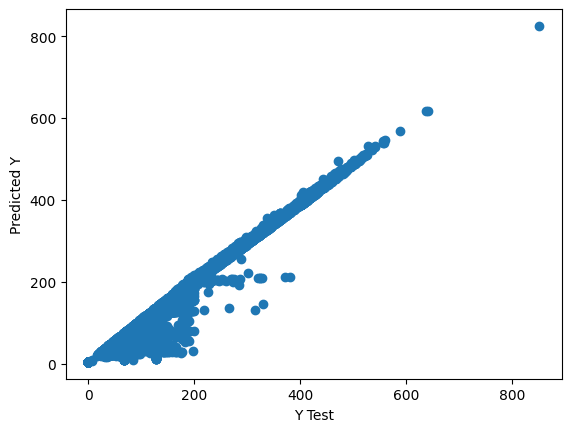

In [131]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [132]:
LR.score(X_test,y_test) 

0.9791014082309275

In [133]:
LR.predict([[77.4,147.7,78.182,100]]) 

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([115.68797484])

In [134]:
LR.predict([[5.2,7.625,76.53,75.0]])

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.27526359])

<AxesSubplot: xlabel='AQI'>

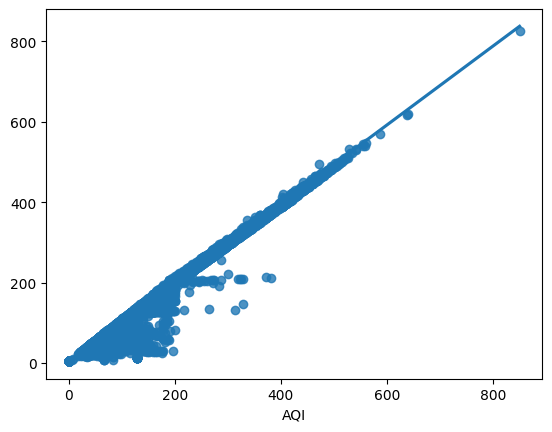

In [138]:
sns.regplot(x = y_test, y = predictions)

In [136]:
print('R^2_Square:%.2f '% r2_score(y_test, predictions))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))

R^2_Square:0.98 
MSE:12.58 


Linear Regression Model 2
Using so2, no2, rspm, spm

In [139]:
X1= data[['so2','no2','rspm','spm']]
y1 = data['AQI']
y.tail()

435734    195.959184
435735    189.004349
435736    189.004349
435737    189.004349
435738    189.004349
Name: AQI, dtype: float64

In [140]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.2,random_state=101)

In [141]:
X_train1.head()

,so2,no2,rspm,spm
360028,3.0,32.0,51.0,126.729064
434684,2.0,37.0,87.0,233.506524
64493,10.6,18.7,108.0,260.000000
433906,4.0,44.0,108.0,233.506524
183595,27.5,20.8,91.0,109.000000


In [ ]:
LR1 = LinearRegression()
LR1.fit(X_train1, y_train1) 
pickle.dump(LR1,open('LR_model.pkl','wb'))


In [143]:
prediction1 = LR1.predict(X_test1)

Text(0, 0.5, 'Predicted Y')

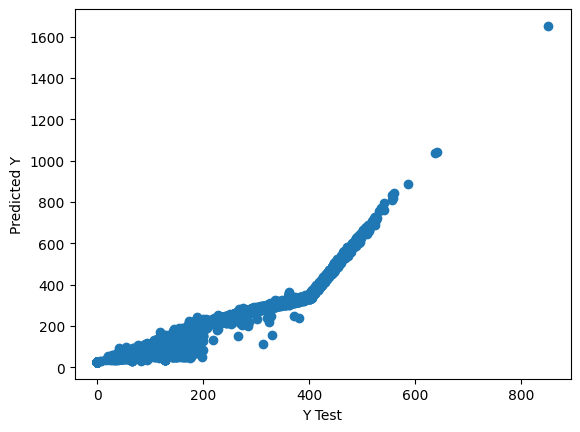

In [144]:
plt.scatter(y_test1,prediction1) #scatter plot for actual and predicted values
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [145]:
LR1.predict([[9.1,16.3,67,179]])

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([154.79655317])

<AxesSubplot: xlabel='AQI'>

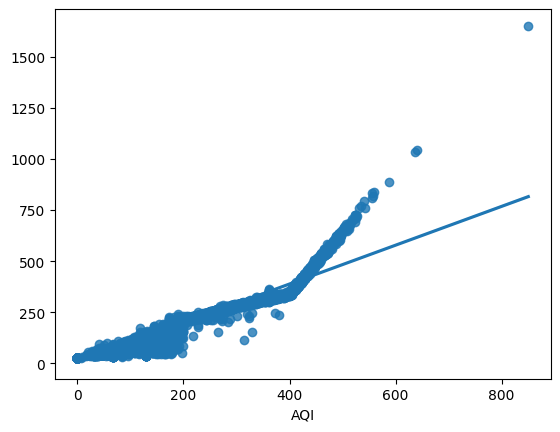

In [147]:
sns.regplot(x = y_test1,y = prediction1) #regression plot

In [148]:
y_test1_np= np.array(y_test1)
prediction1_np = np.array(prediction1)

In [149]:
LR1.score(X_test1,y_test1) 

0.9433954748037253

In [150]:
y_pred = LR1.predict(X_test1)

In [151]:
from sklearn.metrics import classification_report

In [152]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test1,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test1,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test1,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 10.778453473800987
MSE: 428.8281181635667
RMSE: 20.708165494885506


Mean Squared error, R^2 sqaured

In [153]:
print('R^2_Square:%.2f '% r2_score(y_test1, prediction1))
# print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test1, prediction1))
print('RSME : ',np.sqrt(mean_squared_error(y_test1, prediction1))  )

R^2_Square:0.94 
RSME :  20.708165494885506


Classification of AQI

Logistic Regression

1.Using SOi, Noi, RSPMi, SPMi
    

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
X2 = data[['SOi','Noi','RSPMi','SPMi']]
y2 = data['AQI_Range']

In [156]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [157]:
logmodel = LogisticRegression(max_iter=700)
logmodel.fit(X_train2,y_train2)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=700)

In [158]:
predictions = logmodel.predict(X_test)

In [159]:
logmodel.score(X_test2,y_test2) 

0.8584482976838375

Creating new csv file to store AQI range values inorder to cross verify predicted value

In [160]:
# new = pd.DataFrame(d)
# file1 = 'new1.csv'
# new.to_csv(file1,index=True)

NameError: name 'd' is not defined

In [ ]:
# d.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,SOi,Noi,RSPMi,SPMi,PMi,AQI,AQI_Range
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,233.506524,64.890625,12/24/2015,27.5,62.5,185.857143,189.004349,64.890625,189.004349,Poor
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,233.506524,64.890625,12/29/2015,25.0,57.5,0.000000,189.004349,64.890625,189.004349,Poor
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good
435741,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,Good


In [166]:
logmodel.predict([[77.4,147.7,78.182,100]]) #correct

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Poor'], dtype=object)

In [167]:
logmodel.predict([[32.7,35,78.182,203]]) #correct

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Poor'], dtype=object)

In [168]:
logmodel.predict([[100,182.2,78.182,100]]) 

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Poor'], dtype=object)

# Logistic regression model 2

2.Using so2,no2,rspm,spm

In [169]:
X3 = data[['so2','no2','rspm','spm']]
y3 = data['AQI_Range']

In [162]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=42)

In [163]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_train3,y_train3)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
pred_log = logmodel2.predict(X_test3)

In [173]:

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(10,5))
color = 'black'
matrix = plot_confusion_matrix(logmodel2, X_test3, y_test3, cmap=plt.cm.Blues,xticks_rotation= 'vertical')
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Python310\lib\site-packages\sklearn\metrics\__init__.py)

In [174]:
logmodel2.score(X_test3,y_test3) #very low accuracy score

0.6815592962916086

In [175]:
lg_pred = logmodel2.predict(X_test3)

In [176]:
logmodel2.predict([[4.8,17.4,78.48,200]]) 

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Poor'], dtype=object)

In [177]:
logmodel2.predict([[67.4,127.7,78.48,215]]) 

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Poor'], dtype=object)

In [178]:
logmodel2.predict([[2.059,8.94,102,256]]) 

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Hazardous'], dtype=object)

#  Using Random forest classifier

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train3,y_train3)

RandomForestClassifier(n_estimators=10)

In [181]:
model.score(X_test3,y_test3)

0.9996456144791799

In [182]:
RF = model.predict(X_test3)

In [183]:

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(10,5))
color = 'black'
matrix =plot_confusion_matrix(model, X_test3, y_test3, cmap=plt.cm.Blues,xticks_rotation= 'vertical')
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Python310\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
# pred

In [184]:
print('R^2_Square:%.2f '% r2_score(y_test3, RF))
# print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test1, prediction1))
print('RSME : ',np.sqrt(mean_squared_error(y_test3, RF))  )

ValueError: could not convert string to float: 'Poor'

In [185]:
X_train3.head()

,so2,no2,rspm,spm
360294,4.000000,24.0,23.000000,126.729064
278096,5.800000,11.1,129.000000,262.000000
277941,2.900000,26.3,72.000000,140.000000
269637,18.300000,28.6,83.619824,155.000000
272765,5.275874,12.7,80.000000,176.000000


In [186]:
model.predict([[2.059,8.94,102,256]]) #correct

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Unhealthy'], dtype=object)

# Using Decision Tree Classifier

In [187]:
from sklearn import tree

In [188]:
model2 = tree.DecisionTreeClassifier()

In [189]:
model2.fit(X_train3,y_train3)

DecisionTreeClassifier()

In [190]:
y_pred = model2.predict(X_test3)

In [191]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test3, y_pred)  

In [192]:
cm

array([[  926,     0,     1,     1,     0,     0],
       [    0,  1522,     0,     0,     0,     1],
       [    4,     0,  4918,     1,     0,     0],
       [    0,     0,     0, 26647,     0,     0],
       [    0,     0,     0,     2,  3112,     0],
       [    0,     0,     0,     0,     1,  2369]], dtype=int64)

In [ ]:
# X_train3, X_test3, y_train3, y_test3

In [193]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'black'
matrix = plot_confusion_matrix(model2, X_test3, y_test3, cmap=plt.cm.Blues,xticks_rotation= 'vertical')
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Python310\lib\site-packages\sklearn\metrics\__init__.py)

In [194]:
model2.score(X_test3,y_test3) #high accuracy score of 99.98%

0.9997215542336413

Some predictions

In [195]:
print('R^2_Square:%.2f '% r2_score(y_test1, prediction1))
# print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test1, prediction1))
print('RSME : ',np.sqrt(mean_squared_error(y_test1, prediction1))  )

R^2_Square:0.94 
RSME :  20.708165494885506


In [196]:
model2.predict([[9,31,51,205.25]]) # correct

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Poor'], dtype=object)

In [197]:
model2.predict([[2,5.8,17,36]]) # correct

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Good'], dtype=object)

In [198]:
model2.predict([[18.6,48.3,142,285]]) # correct

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Unhealthy'], dtype=object)

In [199]:
model2.predict([[6,11,109,84.41]]) # correct

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Poor'], dtype=object)

In [200]:
model2.predict([[10,16,156,372.66]]) # correct

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Very unhealthy'], dtype=object)

Conclusion

AQI is highly correlated with all the independent variables(so2, no2, rspm, spm)
AQI has been increasing over the years.
Best models for AQI range classification :

Random Forest Classifier
Decision Tree Classifier




In [201]:
df

,state,SOi,Noi,RSPMi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,78.182824,166.840252,166.840252
1,Andhra Pradesh,3.875,8.750,78.182824,166.840252,166.840252
2,Andhra Pradesh,7.750,35.625,78.182824,166.840252,166.840252
3,Andhra Pradesh,7.875,18.375,78.182824,166.840252,166.840252
4,Andhra Pradesh,5.875,9.375,78.182824,166.840252,166.840252
...,...,...,...,...,...,...
435737,West Bengal,27.500,62.500,185.857143,189.004349,189.004349
435738,West Bengal,25.000,57.500,0.000000,189.004349,189.004349
435739,andaman-and-nicobar-islands,0.000,NaN,0.000000,NaN,0.000000
435740,Lakshadweep,0.000,NaN,0.000000,NaN,0.000000
